Task1_0807. MNIST 데이터셋에 대해서 함수형 API로 아래와 같이 ConvNet 레이어를 추가하여 모델을 구성하고 학습 및 평가를 수행하세요.

- ConvNet은 Conv2D 3개, MaxPooling2D 2개로 구성.
- 필터개수는 32, 64, 64개로 필터사이즈는 (3,3),
- MaxPooling2D의 윈도우 크기는 (2,2)
- 활성화 함수는  relu

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

input_layer = Input(shape=(28, 28,1), name='input_layer')
conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu', name='conv1_layer')(input_layer)
conv2 = Conv2D(64, kernel_size=(3, 3), activation='relu', name='conv2_layer')(conv1)
max1 = MaxPooling2D(pool_size=(2, 2), name='max1_layer')(conv2)
conv3 = Conv2D(64, kernel_size=(3, 3), activation='relu', name='conv3_layer')(max1)
max2 = MaxPooling2D(pool_size=(2, 2), name='max2_layer')(conv3)
flatten = Flatten(name='flatten_layer')(max2)

hidden1 = Dense(128, activation='relu', name='hidden1_layer')(flatten)
hidden2 = Dense(64, activation='relu', name='hidden2_layer')(hidden1)

output = Dense(10, activation='softmax', name='output_layer')(hidden2)

model = Model(inputs=input_layer, outputs=output)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

model.fit(train_images, train_labels, epochs=10, batch_size=64)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('테스트 정확도:', test_acc)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_layer (Conv2D)                 │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2_layer (Conv2D)                 │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max1_layer (MaxPooling2D)            │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3_layer (Conv2D)                 │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max2_layer (MaxPooling2D)            │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_layer (Flatten)              │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden1_layer (Dense)                │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden2_layer (Dense)                │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 269,578 (1.03 MB)

 Trainable params: 269,578 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 159s 167ms/step - accuracy: 0.8990 - loss: 0.3262
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 201s 167ms/step - accuracy: 0.9872 - loss: 0.0411
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 205s 170ms/step - accuracy: 0.9910 - loss: 0.0287
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 154s 164ms/step - accuracy: 0.9936 - loss: 0.0203
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 158s 169ms/step - accuracy: 0.9946 - loss: 0.0163
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 154s 164ms/step - accuracy: 0.9958 - loss: 0.0136
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 203s 165ms/step - accuracy: 0.9959 - loss: 0.0134
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 154s 164ms/step - accuracy: 0.9973 - loss: 0.0092
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 155s 165ms/step - accuracy: 0.9979 - loss: 0.0064
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 154s 164ms/step - accuracy: 0.9975 - loss: 0.0068
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.9867 - loss: 0.0439
테스트 정확도: 0.989499986171

Task2는 다음과 같이 수정해서 진행하세요.
Task2_0807. house_train.csv 데이터셋으로 주택가격 예측 모델을 아래와 같이 텐서플로/케라스로 학습시키고 평가하세요.
- Input(shape=(X_train.shape[1],)): 입력층을 추가하며, 입력 데이터의 형상은 X_train의 열 개수와 동일
- 첫 번째 은닉층으로, 10개의 유닛을 가지며 활성화 함수로 ReLU를 사용
- 두 번째 은닉층으로, 30개의 유닛을 가지며 활성화 함수로 ReLU를 사용
- 세 번째 은닉층으로, 40개의 유닛을 가지며 활성화 함수로 ReLU를 사용
- 출력층으로, 주택 가격을 예측하는 하나의 유닛

# ex

### 주택가격 예측
- 아이오아주 에임스 지역에서 2006년 부터 2010년까지 거래된 실제 부동산 판매 기록
- 주거 유형, 차고, 자재 및 환경 등 80개의 서로 다른 속성을 이용해 집의 가격을 예측
- 속성에 대한 상세 설명 : https://jse.amstat.org/v19n3/decock/DataDocumentation.txt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/dataset/house_train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


<Axes: >

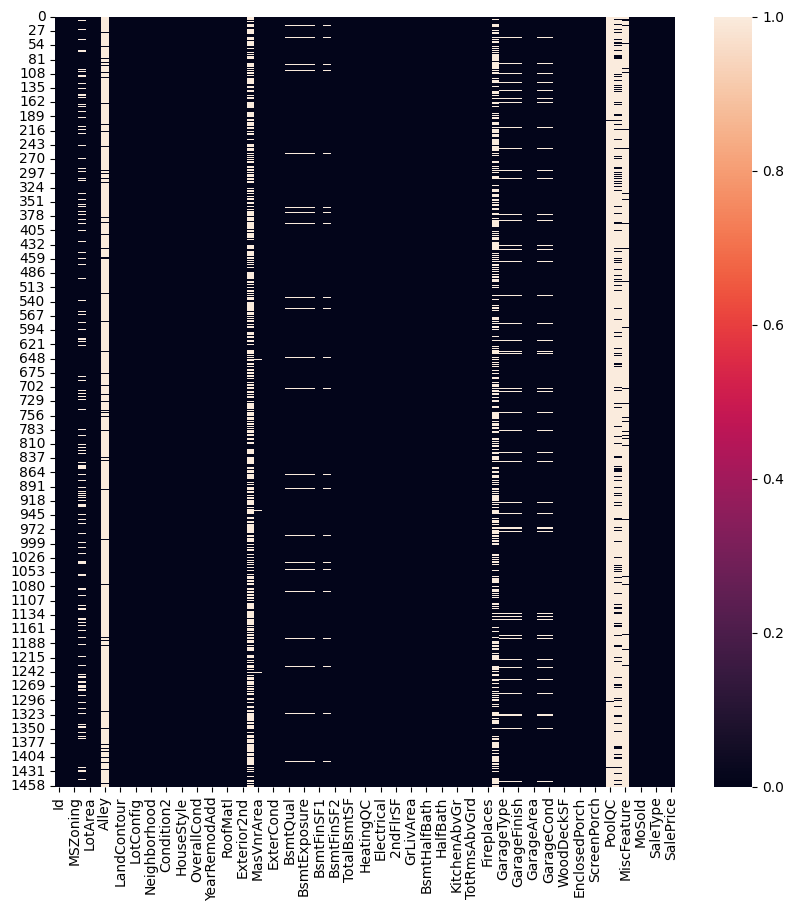

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10),)
sns.heatmap(df.isna(),)

Id, LotFrontage, Alley, MasVnrType, FireplaceQu, PoolQC, Fence, MiscFeature 컬럼 삭제

In [ ]:
df = df.drop(
    ['Id', 'LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'],
    axis=1,
)

In [ ]:
# 컬럼에 결측치가 있는 경우 해당 컬럼의 최빈값으로 대체

for col in df.columns:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

<Axes: >

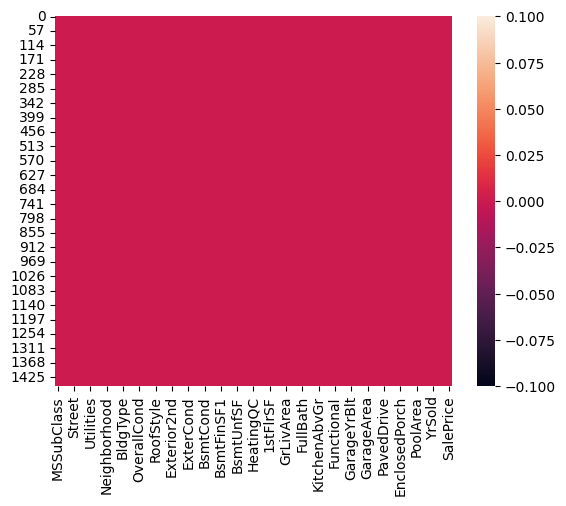

In [ ]:
sns.heatmap(df.isna())

In [ ]:
data_x = df.drop('SalePrice', axis=1)
data_y = df['SalePrice']


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

data_x = to_categorical(data_x)
data_y = to_categorical(data_y)

train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

model = Sequential()

model.add(Input(shape=(train_x.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='sgd', loss='mse')

model.fit(train_x, train_y, epochs=100)

ValueError: invalid literal for int() with base 10: 'RL'

# ex


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/dataset/house_train.csv')
# 결측치 , 카테고리 변수 처리하기
# 속성별 결측치가 몇개인지 확인
df.isnull().sum().sort_values(ascending=False).head(20)



,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81


In [ ]:
# 카테고리형 변수를 0과 1로 이루어진 변수로 바꾸어 줍니다.
df = pd.get_dummies(df)
# 결측치는 전체 칼럽의 평균으로 대체
df = df.fillna(df.mean())

df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
# 속성별 관련도 추출하기
# 데이터 사이의 상관관계 저장

df_corr = df.corr()

# 집 값과 관련이 높은 순서대로 저장
df_corr_sort = df_corr.sort_values(by='SalePrice', ascending=False)

df_corr_sort['SalePrice'].head(10)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
BsmtQual_Ex,0.553105
TotRmsAbvGrd,0.533723


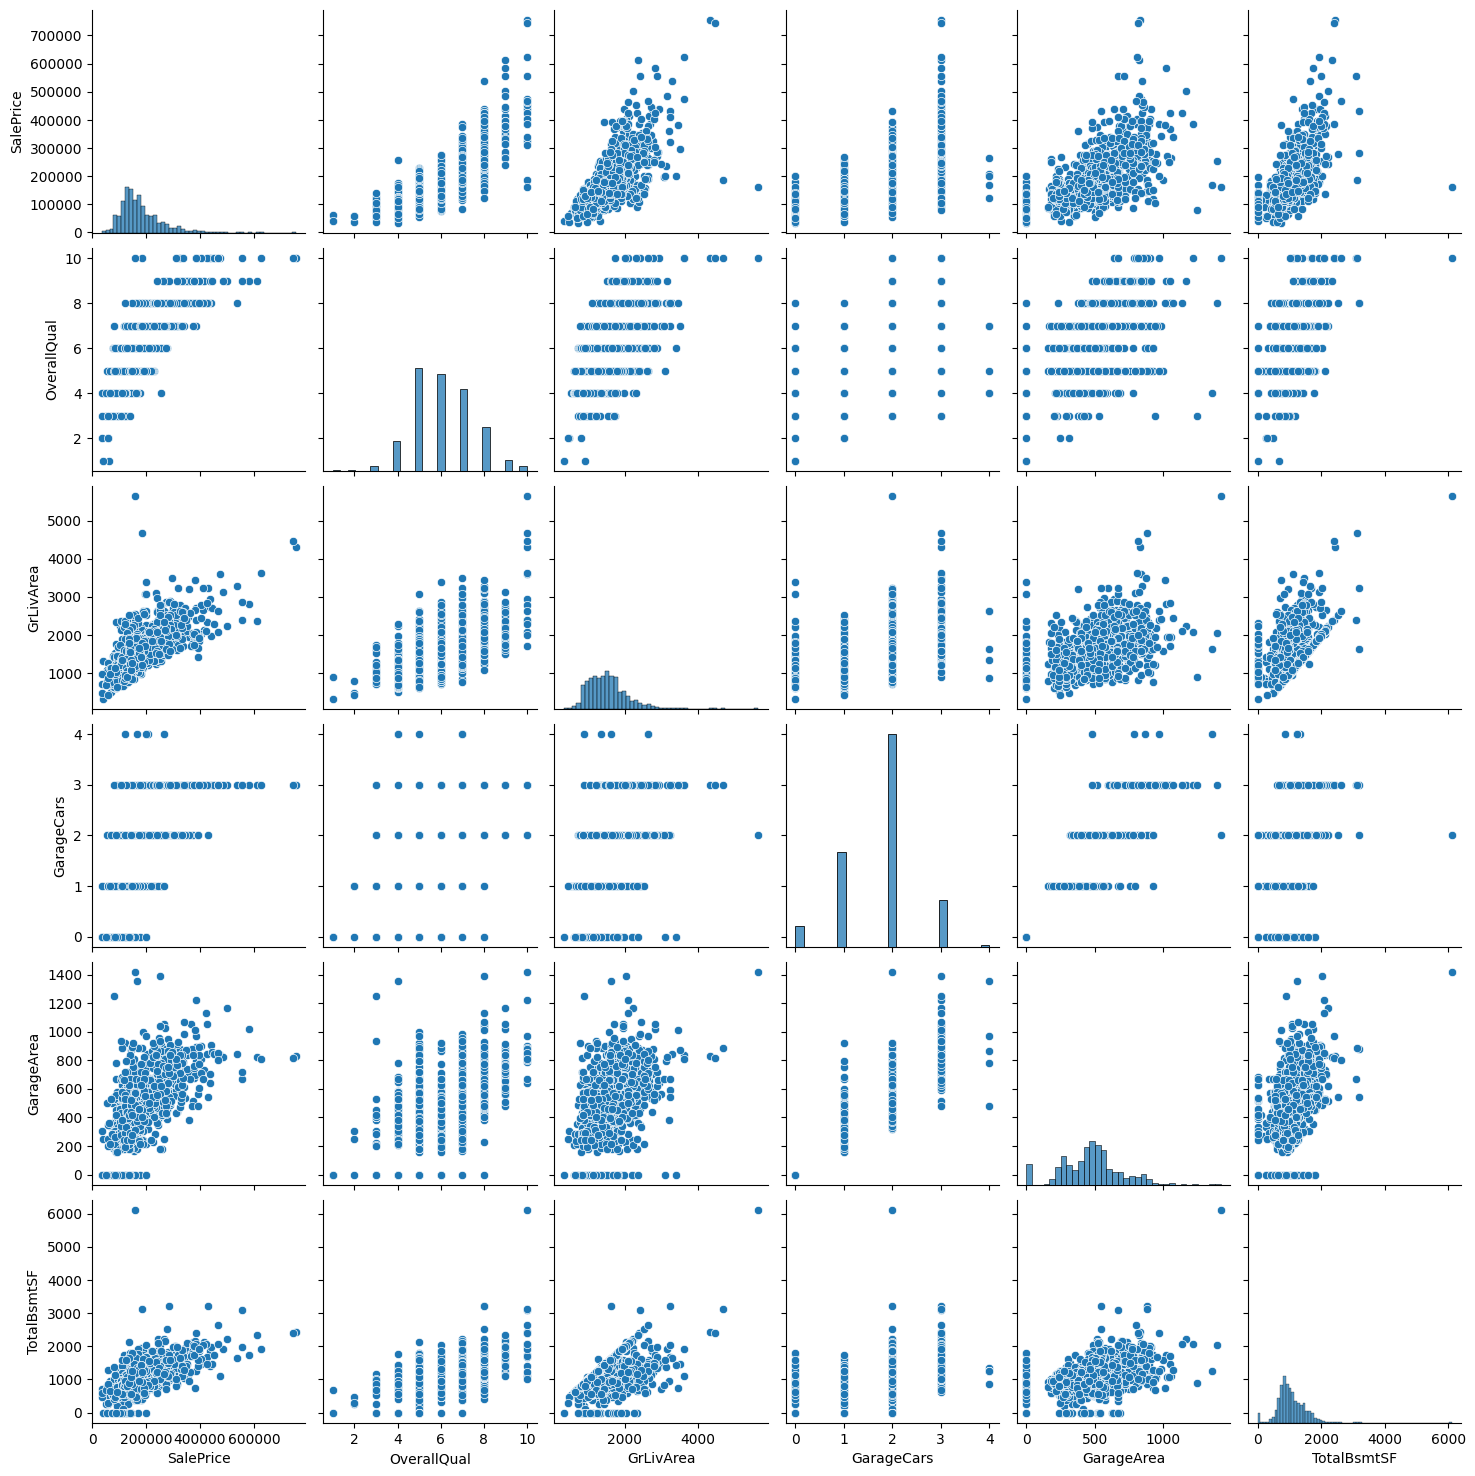

In [ ]:
# 집 값과 관련도가 가장 높은 속성 들을 추출해서 상관도 그래프 그리기
import matplotlib.pyplot as plt
import seaborn as sns

col = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']
sns.pairplot(df[col])

세일프라이스와 상관관계가 있어보임


In [ ]:
# 주택 가격 예측 모델

from tensorflow.keras.layers import Input
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']
X_train_pre = df[col]

y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.summary()

model.compile(optimizer='adam', loss='mse')

# 실행 관련 설정, 전체의 25% 검증셋으로 설정
history = model.fit(X_train, y_train, epochs=3, validation_split=0.25)
# 데이터 사이즈는 28 * 32 = 896 개

# 테스트 데이터를 사용하여 모델 평가
test_loss = model.evaluate(X_test, y_test)
print('테스트 손실값:', test_loss)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 10)                  │              70 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 30)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 40)                  │           1,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              41 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,681 (6.57 KB)

 Trainable params: 1,681 (6.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 30537883648.0000 - val_loss: 16509753344.0000
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 14171539456.0000 - val_loss: 3139319552.0000
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1751435904.0000 - val_loss: 27268940.0000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27943376.0000 
테스트 손실값: 28345672.0


In [ ]:
real_price = []
pred_price = []
X_num =[]

n_iter = 0
Y_prediction = model.predict(X_test).flatten()

for i in range(25):
    real = y_test.iloc[i]
    prediction = Y_prediction[i]

    print(f"실행번호: {n_iter}, 실제 가격: {real}, 예측 가격: {prediction}")
    real_price.append(real)
    pred_price.append(prediction)
    n_iter += 1
    X_num.append(n_iter)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
실행번호: 0, 실제 가격: 154500, 예측 가격: 158672.625
실행번호: 1, 실제 가격: 325000, 예측 가격: 333432.8125
실행번호: 2, 실제 가격: 115000, 예측 가격: 118320.6953125
실행번호: 3, 실제 가격: 159000, 예측 가격: 163254.734375
실행번호: 4, 실제 가격: 315500, 예측 가격: 324219.9375
실행번호: 5, 실제 가격: 75500, 예측 가격: 77450.8125
실행번호: 6, 실제 가격: 311500, 예측 가격: 319157.9375
실행번호: 7, 실제 가격: 146000, 예측 가격: 149939.59375
실행번호: 8, 실제 가격: 84500, 예측 가격: 86661.59375
실행번호: 9, 실제 가격: 135500, 예측 가격: 139056.234375
실행번호: 10, 실제 가격: 145000, 예측 가격: 148702.1875
실행번호: 11, 실제 가격: 130000, 예측 가격: 133564.796875
실행번호: 12, 실제 가격: 81000, 예측 가격: 84308.640625
실행번호: 13, 실제 가격: 214000, 예측 가격: 219950.546875
실행번호: 14, 실제 가격: 181000, 예측 가격: 185762.0
실행번호: 15, 실제 가격: 134500, 예측 가격: 138169.328125
실행번호: 16, 실제 가격: 183500, 예측 가격: 188246.625
실행번호: 17, 실제 가격: 135000, 예측 가격: 138665.390625
실행번호: 18, 실제 가격: 118400, 예측 가격: 121756.921875
실행번호: 19, 실제 가격: 226000, 예측 가격: 232235.53125
실행번호: 20, 실제 가격: 155000, 예측 가격: 159257.9375
실행번호: 21, 실제 가격: 210000, 예측 가격: 215

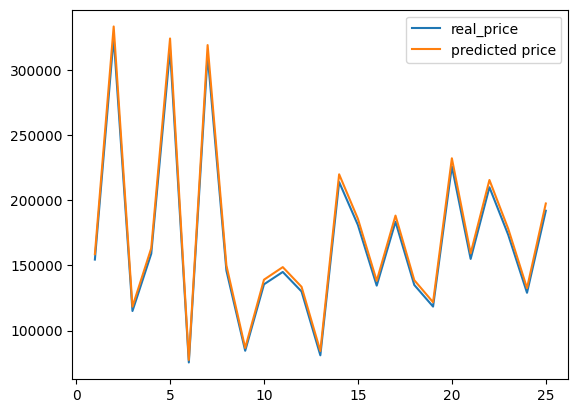

In [ ]:
plt.plot(X_num, real_price, label='real_price')
plt.plot(X_num, pred_price, label='predicted price')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential

# 주택 가격 예측 모델
# 집 값을 제외한 나머지 열을 저장

cols_train=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']
X_train_pre = df[cols_train]

# 집 값을 저장
y = df['SalePrice']

# 전체의 80%를 학습셋으로, 20%를 테스트셋으로 지정
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2, shuffle=True, random_state=123)

# 모델의 구조를 설정
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.summary()

# 모델 실행

model.compile(optimizer='adam',
              loss='mean_squared_error')

# 실행 관련 설정을 하는 부분입니다. 전체의 20%를 검증셋으로 설정
history = model.fit(X_train, y_train, validation_split=0.25, epochs=200, batch_size=32)

# 테스트 데이터를 사용하여 모델 평가
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss:, {test_loss}')

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 10)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 30)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 40)                  │           1,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │              41 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,671 (6.53 KB)

 Trainable params: 1,671 (6.53 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 34927603712.0000 - val_loss: 38435917824.0000
Epoch 2/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37677658112.0000 - val_loss: 37231185920.0000
Epoch 3/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38001192960.0000 - val_loss: 34184429568.0000
Epoch 4/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 33598973952.0000 - val_loss: 27904774144.0000
Epoch 5/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26338963456.0000 - val_loss: 17633353728.0000
Epoch 6/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15308199936.0000 - val_loss: 6907165696.0000
Epoch 7/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4627041792.0000 - val_loss: 3029832192.0000
Epoch 8/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2515977984.0000 - val_loss: 3151067392.0000
Epoch 9/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2160539648.0000 - val_loss: 3060684288.0000
Epoch 10/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2

In [ ]:
# 예측 값과 실제 값, 실행 번호가 들어갈 빈 리스트를 만듬
real_prices = []
pred_prices = []
X_num = []

# 25개의 샘플을 뽑아 실제 값, 예측 값을 출력

n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(24):
    real = y_test.iloc[i]
    prediction = Y_prediction[i]

    print(f'실행번호: {n_iter}, 실제 가격: {round(real)}, 예상 가격: {round(prediction)}')
    real_prices.append(real)
    pred_prices.append(prediction)
    n_iter = n_iter + 1
    X_num.append(n_iter)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
실행번호: 0, 실제 가격: 222500, 예상 가격: 198888
실행번호: 1, 실제 가격: 87000, 예상 가격: 225021
실행번호: 2, 실제 가격: 130000, 예상 가격: 181912
실행번호: 3, 실제 가격: 274300, 예상 가격: 227540
실행번호: 4, 실제 가격: 140000, 예상 가격: 162086
실행번호: 5, 실제 가격: 259000, 예상 가격: 224985
실행번호: 6, 실제 가격: 309000, 예상 가격: 256583
실행번호: 7, 실제 가격: 127500, 예상 가격: 108672
실행번호: 8, 실제 가격: 155000, 예상 가격: 170314
실행번호: 9, 실제 가격: 147000, 예상 가격: 126246
실행번호: 10, 실제 가격: 159000, 예상 가격: 173428
실행번호: 11, 실제 가격: 220000, 예상 가격: 199858
실행번호: 12, 실제 가격: 140000, 예상 가격: 134334
실행번호: 13, 실제 가격: 108000, 예상 가격: 131864
실행번호: 14, 실제 가격: 260000, 예상 가격: 218103
실행번호: 15, 실제 가격: 207500, 예상 가격: 199914
실행번호: 16, 실제 가격: 115000, 예상 가격: 125022
실행번호: 17, 실제 가격: 325624, 예상 가격: 275695
실행번호: 18, 실제 가격: 212000, 예상 가격: 195385
실행번호: 19, 실제 가격: 167900, 예상 가격: 170283
실행번호: 20, 실제 가격: 151000, 예상 가격: 157247
실행번호: 21, 실제 가격: 162900, 예상 가격: 183455
실행번호: 22, 실제 가격: 109500, 예상 가격: 109125
실행번호: 23, 실제 가격: 143000, 예상 가격: 146135


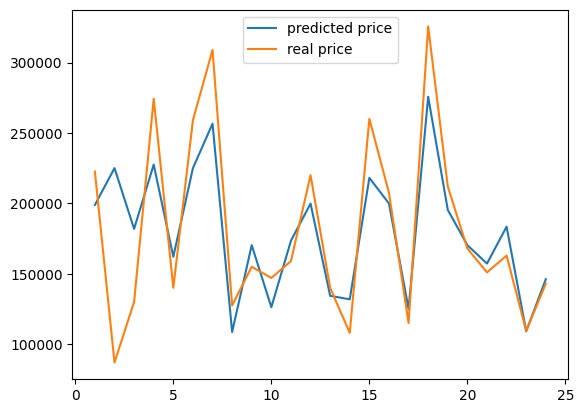

In [ ]:
# 그래프를 통해 샘플로 뽑은 25개의 값을 비교

plt.plot(X_num, pred_prices, label='predicted price')
plt.plot(X_num, real_prices, label='real price')
plt.legend()
plt.show()